In [ ]:
import numpy as np
import matplotlib.pyplot as plt

8.273782635069178


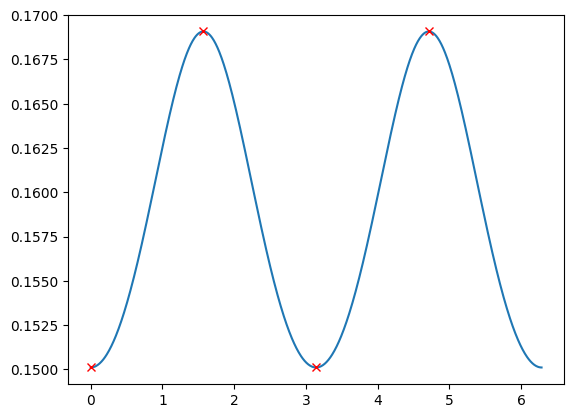

In [61]:
# In the paper they use the initial condition
rho_0_unnorm = lambda x: 1 + np.exp(-(np.sin(x - np.pi/2)**2) / 2) / np.sqrt(2 * np.pi)
x_grid = np.linspace(0, 2 * np.pi, 1000)
xf = np.linspace(0, 2 * np.pi, 4, endpoint=False)
h = (x_grid[1] - x_grid[0])
Z_0 = h * np.sum(rho_0_unnorm(x_grid))
print(Z_0)
plt.plot(x_grid, rho_0_unnorm(x_grid)/Z_0)
plt.plot(xf, rho_0_unnorm(xf) / Z_0, 'x', color='red')


[0.29159771 0.28754989]


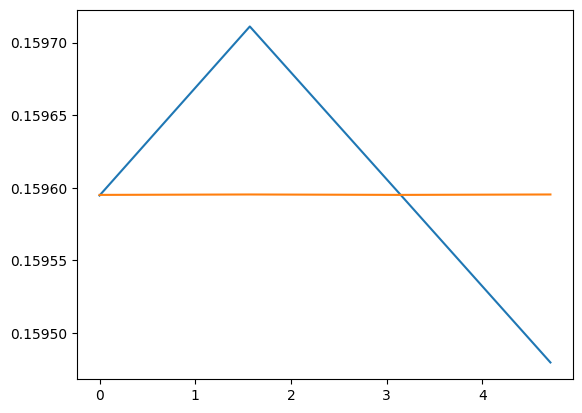

In [ ]:
# First I'll try a simple implementation to see if I can get at least get a feel for what
# the thing should feel like

# Initial setup things
seed = 42
N_trials = 2
rng = np.random.default_rng(seed)
batch_size = 
l = 0
Z_0 = 1 / 8.273782635069178 # normalisation constant
rho_0 = lambda x: Z_0 * (1 + np.exp(-(np.sin(x - np.pi/2)**2) / 2) / np.sqrt(2 * np.pi))
N_particles = 2 * 10**6
phi_fn = lambda x: np.cos(x)

# FD Parameters
lam = 0.25
nf = 2**(l+2) # number of cells
hf = 2 * np.pi / (nf)
dtf = lam * hf**2
timesteps_f = nf**2 # this corresponds to a total time T = pi**2.

if l > 0:
    nc = nf // 2
    hc = 1 / nc
    dtc = lam * hc**2
    timesteps_c = nc**2

nsteps = nf**2

# final initial setup before timestepping
xf = np.linspace(0, 2 * np.pi, nf, endpoint=False) # ensure endpoint excluded for periodic boundary conditions
rho_bar = rho_0(xf) # I will need to update E[rho]. At t = 0 this is initial conditions.
rho = np.tile(rho_bar, (N_trials, 1)).T

std_f = np.sqrt(dtf / hf)

# begin stepping
for N1 in range(0, N, batch_size):
    N2 = min(batch_size, N - N1)
for _ in range(nsteps):
    # calculate components of update
    sqrt_rho = np.sqrt(np.maximum(rho, 0))
    dW = std_f * rng.standard_normal((nf, N_trials))
    flux = sqrt_rho * dW
    divergence = (np.roll(flux, -1, axis=0) - np.roll(flux, 1, axis=0))/(2*hf)
    
    laplacian = lam * (np.roll(rho, -1, axis=0) - 2 * rho + np.roll(rho, 1, axis=0)) / 2
    rho += laplacian + divergence / np.sqrt(N_particles)
    rho_bar += lam * (np.roll(rho_bar, -1, axis=0) - 2 * rho_bar + np.roll(rho_bar, 1, axis=0)) / 2

# now calculate QoI
diff = rho - rho_bar[:, np.newaxis]
phi_vals = phi_fn(xf)
inner_products = hf * np.sum(diff * phi_vals[:, np.newaxis], axis=0)
Pf = N_particles * inner_products**2


plt.plot(xf, np.mean(rho, axis=1))
plt.plot(xf, rho_bar)
print(Pf)






In [86]:
a = np.array([[1,2,3,4],
             [4,3,2,1]]).T
b = np.array([1,2,1,2])
print(a, b)
a - b[:, np.newaxis]

[[1 4]
 [2 3]
 [3 2]
 [4 1]] [1 2 1 2]


array([[ 0,  3],
       [ 0,  1],
       [ 2,  1],
       [ 2, -1]])